<a href="https://colab.research.google.com/github/savinthie/20210181_Savinthie_Suwandaratna_Proof_of_Concept/blob/main/POC_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import pandas as pd
import numpy as np

**Mount the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**STEP 1: Data collection**

Load the secondary household data set

In [3]:
household_dataframe = pd.read_csv('/content/drive/MyDrive/FYP 2024 25/USDataset.csv', header = 1)

In [4]:
household_dataframe

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,1001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,1001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,1001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,1001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,1001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


Load only a sample dataset for the POC

In [5]:
poc_sample_size = 31430/2
print(poc_sample_size)

15715.0


In [6]:
#create the dataframe at poc level
poc_dataframe = household_dataframe.sample(n=int(poc_sample_size), random_state=42)
poc_dataframe

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
30973,3098,WI,55097,Portage County,1p3c,1154,1030,1658,1191,773,...,"$14,292","$9,276","$22,092","$16,932","$108,684","81,541",72,30,60,15.0
5671,568,ID,16031,Cassia County,1p1c,843,474,1444,642,466,...,"$7,704","$5,592","$6,072","$6,756","$59,256","60,006",44,36,22,29.0
9704,971,KS,20163,Rooks County,1p4c,971,1163,1896,1671,755,...,"$20,052","$9,060","$11,592","$15,120","$104,184","68,589",105,55,75,31.0
15767,1577,MO,29185,St. Clair County,2p2c,746,877,1573,1801,575,...,"$21,612","$6,900","$7,848","$9,072","$83,772","53,008",115,90,13,103.0
24281,2429,SD,46137,Ziebach County,1p1c,826,509,1544,1007,473,...,"$12,084","$5,676","$5,304","$6,480","$64,104","40,431",66,15,5,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24085,2409,SD,46093,Meade County,2p0c,769,633,1399,1269,497,...,"$15,228","$5,964",$0,"$7,512","$62,316","75,749",66,2,28,28.0
13293,1330,MN,27029,Clearwater County,1p3c,1212,952,1928,1153,766,...,"$13,836","$9,192","$17,340","$16,068","$105,528","69,524",87,46,12,78.0
19234,1924,NC,37065,Edgecombe County,1p4c,1096,1080,1580,1437,771,...,"$17,244","$9,252","$14,088","$14,280","$99,924","46,212",100,91,14,95.0
24280,2429,SD,46137,Ziebach County,1p0c,575,346,1220,640,326,...,"$7,680","$3,912",$0,"$5,724","$43,008","40,431",66,15,5,62.0


**STEP 2: Data pre processing**

Data cleansing

In [7]:
poc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15715 entries, 30973 to 7289
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   case_id               15715 non-null  int64  
 1   State abv.            15715 non-null  object 
 2   county_fips           15715 non-null  int64  
 3   County                15715 non-null  object 
 4   Family                15715 non-null  object 
 5   Housing               15715 non-null  int64  
 6   Food                  15715 non-null  int64  
 7   Transportation        15715 non-null  int64  
 8   Healthcare            15715 non-null  int64  
 9   Other Necessities     15715 non-null  int64  
 10  Childcare             15715 non-null  int64  
 11  Taxes                 15715 non-null  int64  
 12  Total                 15715 non-null  int64  
 13  Housing.1             15715 non-null  object 
 14  Food.1                15715 non-null  object 
 15  Transportation.1     

summary of the dataset are as follows;


*   datapoints: 31430

*   data variables: 26



Removing spaces and converting the names of the data variables to lowercase

In [8]:
poc_dataframe.columns = [col.lower().replace(' ','').replace('.','') for col in poc_dataframe.columns ]


selecting the required data variables

In [9]:
# Keeping the required columns
required_columns = ['stateabv', 'county', 'family', 'housing', 'food', 'transportation',
                'healthcare', 'othernecessities', 'childcare', 'taxes', 'total',
                'median_family_income', 'num_counties_in_st']

In [10]:

new_household_dataframe = poc_dataframe[required_columns].copy()


In [11]:
new_household_dataframe.head()

,stateabv,county,family,housing,food,transportation,healthcare,othernecessities,childcare,taxes,total,median_family_income,num_counties_in_st
30973,WI,Portage County,1p3c,1154,1030,1658,1191,773,1841,1411,9057,"81,541",72
5671,ID,Cassia County,1p1c,843,474,1444,642,466,506,563,4938,"60,006",44
9704,KS,Rooks County,1p4c,971,1163,1896,1671,755,966,1260,8682,"68,589",105
15767,MO,St. Clair County,2p2c,746,877,1573,1801,575,654,756,6981,"53,008",115
24281,SD,Ziebach County,1p1c,826,509,1544,1007,473,442,540,5342,"40,431",66


Splitting the dataset in to the test  set and train set

import libraries

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
feature_matrix_train, feature_matrix_test, target_vector_train, target_vector_test = train_test_split(new_household_dataframe.drop(columns=['housing', 'food', 'transportation',
                                                                      'healthcare', 'othernecessities',
                                                                      'childcare', 'taxes']),
                                                    new_household_dataframe[['housing', 'food', 'transportation', 'healthcare',
                                                         'othernecessities', 'childcare', 'taxes']],
                                                    test_size=0.2, random_state=100)

**STEP 3: Feature engineering & feature selection**

In [14]:
# created a new parent feature from the family instance
feature_matrix_train['number_of_parents'] = feature_matrix_train['family'].str.slice(0,1).astype(int)

In [15]:
#created a new children feature from the family instance
feature_matrix_train['number_of_children'] = feature_matrix_train['family'].str.slice(2,3).astype(int)

In [16]:
#create a new number of family member instance from the 2 new instances
feature_matrix_train['number_of_family_members'] = feature_matrix_train['number_of_parents'] + feature_matrix_train['number_of_children']

In [17]:
# create flags (binarizing)
#create a new is single parent feature
feature_matrix_train['is_single_parent'] = np.where(feature_matrix_train['number_of_family_members'] == 1,1,0)

In [18]:
#create a new is no child feature
feature_matrix_train['is_no_child'] = np.where(feature_matrix_train['number_of_children']== 0,1,0)

In [19]:
# preparing the test data in the same format
# created a new function
def test_data_preparation(poc_dataframe, feature_matrix_train):
    poc_dataframe['is_single_parent'] = np.where(poc_dataframe['family'].str.slice(0, 1).astype(int) == 1, 1, 0)
    poc_dataframe['number_of_children'] = poc_dataframe['family'].str.slice(2,3).astype(int)
    poc_dataframe['median_family_income'] = poc_dataframe['median_family_income'].str.replace(',','').fillna('0').astype(int)
    return poc_dataframe

In [20]:
feature_matrix_test = test_data_preparation(feature_matrix_test, feature_matrix_train)

In [21]:
feature_matrix_train.head()

,stateabv,county,family,total,median_family_income,num_counties_in_st,number_of_parents,number_of_children,number_of_family_members,is_single_parent,is_no_child
30939,WI,Ozaukee County,2p4c,12157,"106,687",72,2,4,6,0,0
1599,AR,Monroe County,2p4c,8388,"67,631",75,2,4,6,0,0
20843,OH,Jefferson County,1p3c,8435,"61,655",88,1,3,4,0,0
23552,SC,Pickens County,1p2c,6640,"66,822",46,1,2,3,0,0
6757,IL,Richland County,2p2c,7909,"72,147",102,2,2,4,0,0


In [22]:
feature_matrix_test['number_of_parents'] = feature_matrix_test['family'].str.slice(0, 1).astype(int)
feature_matrix_test['number_of_family_members'] = feature_matrix_test['number_of_children'] + feature_matrix_test['number_of_parents']
feature_matrix_test['is_no_child'] = np.where(feature_matrix_test['number_of_children'] == 0, 1, 0)

In [23]:
feature_matrix_test.head()

,stateabv,county,family,total,median_family_income,num_counties_in_st,is_single_parent,number_of_children,number_of_parents,number_of_family_members,is_no_child
23220,SC,Barnwell County,1p0c,3213,52139,46,1,0,1,1,1
1866,AR,Yell County,2p1c,5551,64475,75,0,1,2,3,0
4605,GA,Hart County,2p0c,4156,65226,159,0,0,2,2,1
11121,KY,Wolfe County,1p1c,4565,80563,120,1,1,1,2,0
15693,MO,Putnam County,1p3c,8039,56860,115,1,3,1,4,0


In [24]:
#get training set information
feature_matrix_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12572 entries, 30939 to 6215
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   stateabv                  12572 non-null  object
 1   county                    12572 non-null  object
 2   family                    12572 non-null  object
 3   total                     12572 non-null  int64 
 4   median_family_income      12565 non-null  object
 5   num_counties_in_st        12572 non-null  int64 
 6   number_of_parents         12572 non-null  int64 
 7   number_of_children        12572 non-null  int64 
 8   number_of_family_members  12572 non-null  int64 
 9   is_single_parent          12572 non-null  int64 
 10  is_no_child               12572 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.2+ MB


In [25]:
#converted median income from object to int
feature_matrix_train['median_family_income'] = feature_matrix_train['median_family_income'].str.replace(',','').fillna('0').astype(int)

In [26]:
feature_matrix_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12572 entries, 30939 to 6215
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   stateabv                  12572 non-null  object
 1   county                    12572 non-null  object
 2   family                    12572 non-null  object
 3   total                     12572 non-null  int64 
 4   median_family_income      12572 non-null  int64 
 5   num_counties_in_st        12572 non-null  int64 
 6   number_of_parents         12572 non-null  int64 
 7   number_of_children        12572 non-null  int64 
 8   number_of_family_members  12572 non-null  int64 
 9   is_single_parent          12572 non-null  int64 
 10  is_no_child               12572 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.2+ MB


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
input_features = ['number_of_parents', 'number_of_children', 'number_of_family_members', 'is_single_parent', 'is_no_child', 'median_family_income','total','num_counties_in_st']

In [29]:
feature_matrix_train = feature_matrix_train[input_features]

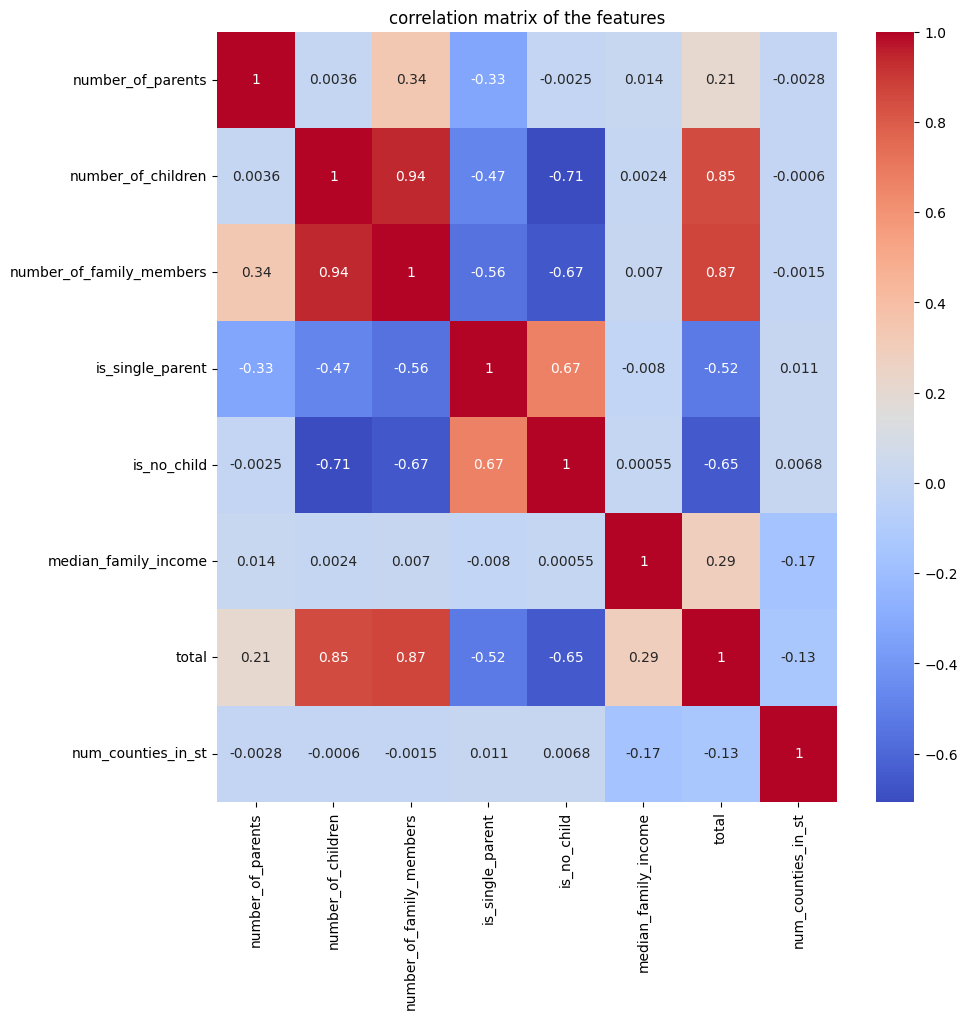

,number_of_parents,number_of_children,number_of_family_members,is_single_parent,is_no_child,median_family_income,total,num_counties_in_st
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.153356,0.202011,0.241312,-0.026659,-0.043132,0.142884,0.238981,0.089188
std,0.392604,0.655318,0.659508,0.581121,0.632220,0.368291,0.639081,0.374493
min,-0.331476,-0.706564,-0.666215,-0.556709,-0.706564,-0.165077,-0.647884,-0.165077
25%,-0.002573,-0.118929,-0.140293,-0.486573,-0.652467,-0.001580,-0.231559,-0.035567
50%,0.008925,0.002984,0.171713,-0.169730,-0.000974,0.004691,0.250631,-0.001041
75%,0.241106,0.871953,0.887159,0.175616,0.172788,0.083683,0.853370,0.007741
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
corr_matrix = feature_matrix_train.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix of the features')
plt.show()
corr_matrix.describe()


In [31]:
from sklearn.preprocessing import StandardScaler
#Normalizing the data
scaler_feature = StandardScaler()
scaler_target = StandardScaler()

In [32]:
#removing the flag (binarizing) features from the train set
#is_single_parent and is_no_child are removed
input_features = ['number_of_parents', 'number_of_children', 'number_of_family_members','median_family_income','total','num_counties_in_st']

In [33]:
scaled_feature_train = scaler_feature.fit_transform(feature_matrix_train[input_features])
scaled_feature_test = scaler_target.fit_transform(feature_matrix_test[input_features])


In [34]:
scaled_target_train = scaler_target.fit_transform(target_vector_train)
scaled_target_test = scaler_target.fit_transform(target_vector_test)

In [35]:
# reshaping the inputs to 3D for RNN
feature_rnn_train = scaled_feature_train.reshape(scaled_feature_train.shape[0], 1, scaled_feature_train.shape[1])
feature_rnn_test = scaled_feature_test.reshape(scaled_feature_test.shape[0], 1, scaled_feature_test.shape[1])

**STEP 4: Model selection**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, SimpleRNN

In [37]:
#initialize the model
household_rnn_model = Sequential()
household_rnn_model.add(SimpleRNN(units=64,activation ='relu' ,input_shape=(feature_rnn_train.shape[1], feature_rnn_train.shape[2])))
#Output layer
household_rnn_model.add(Dense(7, activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
from tensorflow.keras.optimizers import Adam
household_rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

**STEP 5: Model Training**

In [39]:
model_training = household_rnn_model.fit(feature_rnn_train, scaled_target_train, epochs=20, batch_size=32,verbose=1, validation_data=(feature_rnn_test, scaled_target_test))

Epoch 1/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2437 - loss: 0.7137 - val_accuracy: 0.3901 - val_loss: 0.5302
Epoch 2/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4118 - loss: 0.5210 - val_accuracy: 0.4139 - val_loss: 0.5123
Epoch 3/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4163 - loss: 0.5075 - val_accuracy: 0.4133 - val_loss: 0.5086
Epoch 4/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4216 - loss: 0.5043 - val_accuracy: 0.4295 - val_loss: 0.5061
Epoch 5/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4297 - loss: 0.5036 - val_accuracy: 0.4206 - val_loss: 0.5051
Epoch 6/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4280 - loss: 0.4893 - val_accuracy: 0.4286 - val_loss: 0.5035
Epoch 7/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4361 - loss: 0.4899 - val_accuracy: 0.4273 - val_loss: 0.5034
Epoch 8/20
393/393 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4352 - loss: 0.4945 - val_accuracy: 0.

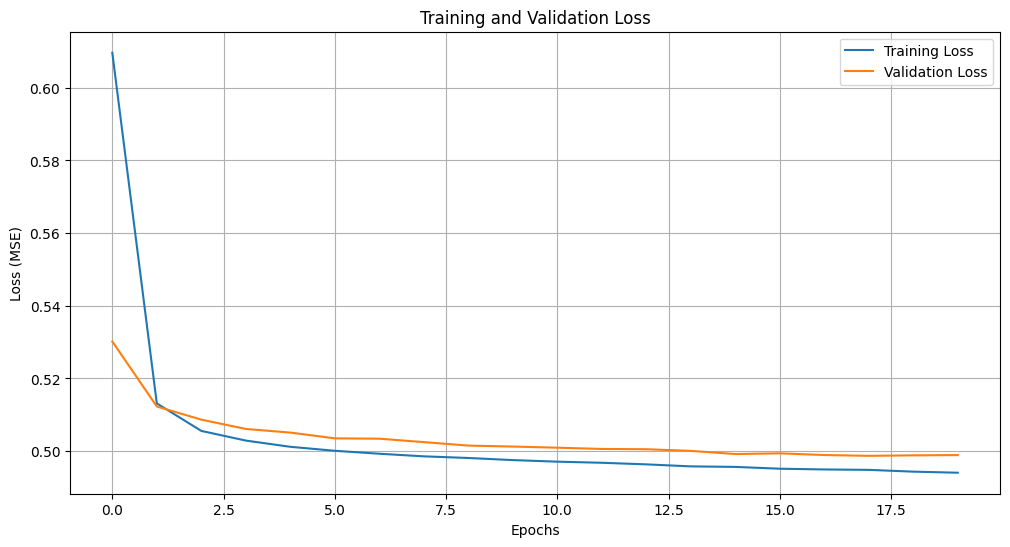

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(model_training.history['loss'], label='Training Loss')
plt.plot(model_training.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

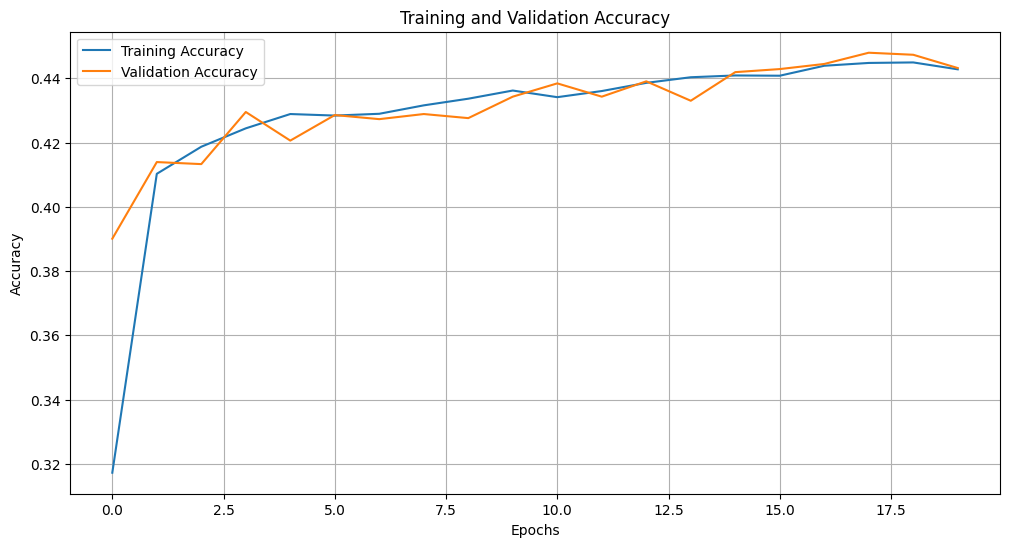

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(model_training.history['accuracy'], label='Training Accuracy')
plt.plot(model_training.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [42]:
#predicting using the train and test split
predicted_train = household_rnn_model.predict(feature_rnn_train)
predicted_test = household_rnn_model.predict(feature_rnn_test)

393/393 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [43]:
#inversing the scale to get the original values
inverse_predicted_train = scaler_target.inverse_transform(predicted_train)
inverse_predicted_test = scaler_target.inverse_transform(predicted_test)

**STEP 6: Model Testing and Evaluation**

In [44]:
# Model evaluation
def regr_report(x, y):
    mae = round(mean_absolute_error(x, y), 4) # Use the round function
    r2 = round(r2_score(x, y), 4) # Use the round function
    rmse = round(np.sqrt(mean_squared_error(x, y)), 4) # Use the round function
    return f'MAE: {mae}, R-Squared: {r2}, RMSE: {rmse}'

In [45]:
# Evaluating performance on each target
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
for i, target in enumerate(target_vector_train.columns):
    print(f'Model Results for {target.capitalize()}:')
    print('Train Data:', regr_report(target_vector_train[target], inverse_predicted_train[:, i]))
    print('Test Data:', regr_report(target_vector_test[target], inverse_predicted_test[:, i]))
    print()

Model Results for Housing:
Train Data: MAE: 188.6402, R-Squared: 0.6441, RMSE: 233.2197
Test Data: MAE: 191.9944, R-Squared: 0.625, RMSE: 237.3169

Model Results for Food:
Train Data: MAE: 171.3346, R-Squared: 0.5104, RMSE: 238.9694
Test Data: MAE: 171.0768, R-Squared: 0.5044, RMSE: 237.5047

Model Results for Transportation:
Train Data: MAE: 154.2869, R-Squared: 0.2642, RMSE: 203.6628
Test Data: MAE: 151.9507, R-Squared: 0.2754, RMSE: 199.8468

Model Results for Healthcare:
Train Data: MAE: 293.0247, R-Squared: 0.4249, RMSE: 372.633
Test Data: MAE: 295.6172, R-Squared: 0.4171, RMSE: 372.2707

Model Results for Othernecessities:
Train Data: MAE: 112.9166, R-Squared: 0.572, RMSE: 150.7817
Test Data: MAE: 115.6558, R-Squared: 0.5612, RMSE: 152.8425

Model Results for Childcare:
Train Data: MAE: 340.9635, R-Squared: 0.4514, RMSE: 462.5366
Test Data: MAE: 345.787, R-Squared: 0.4563, RMSE: 467.3094

Model Results for Taxes:
Train Data: MAE: 181.7905, R-Squared: 0.6824, RMSE: 232.0003
Test D

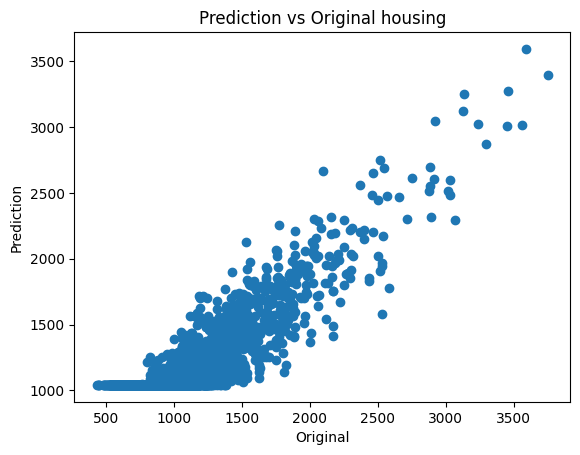

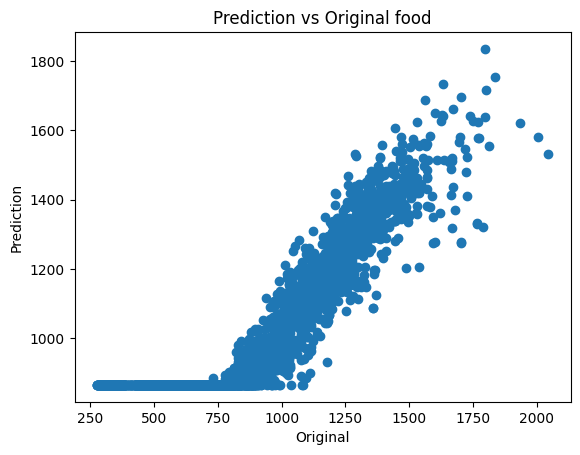

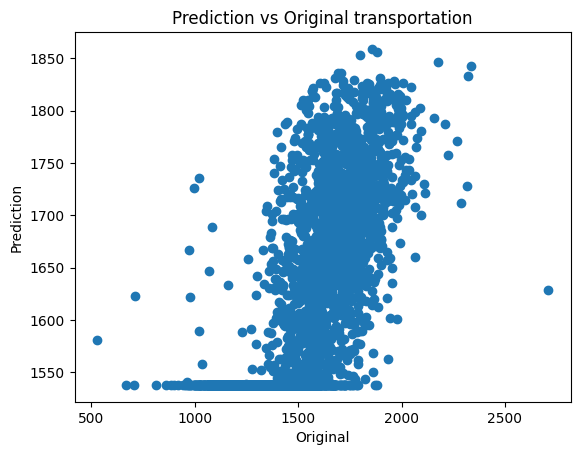

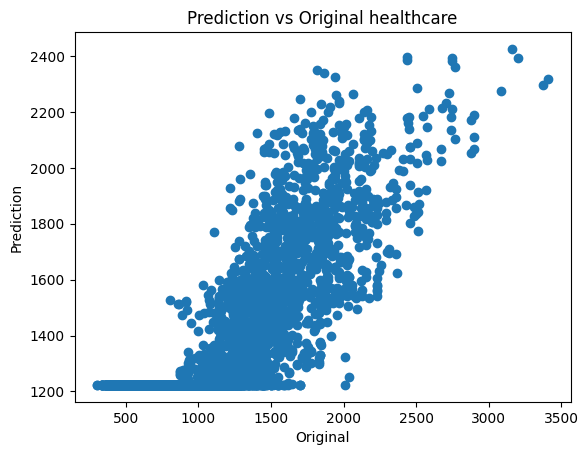

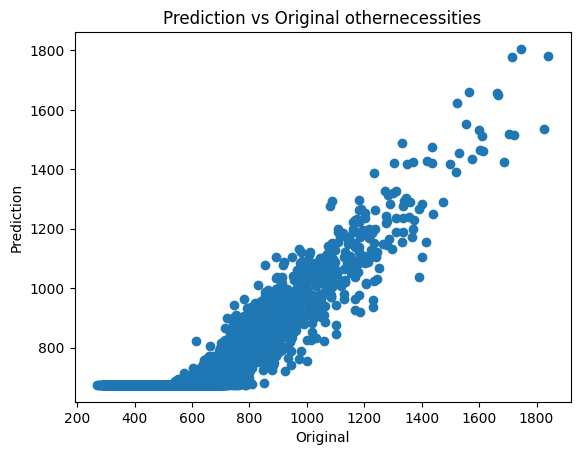

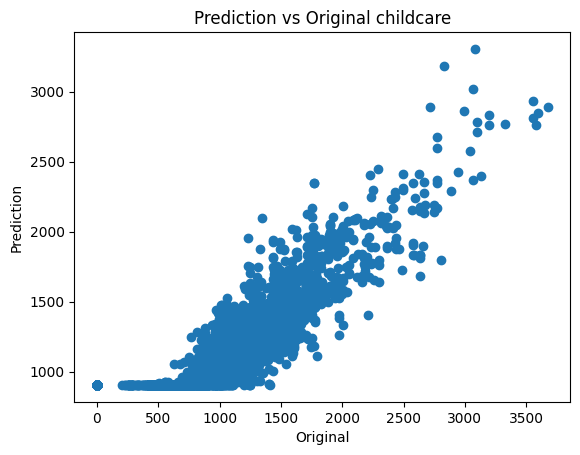

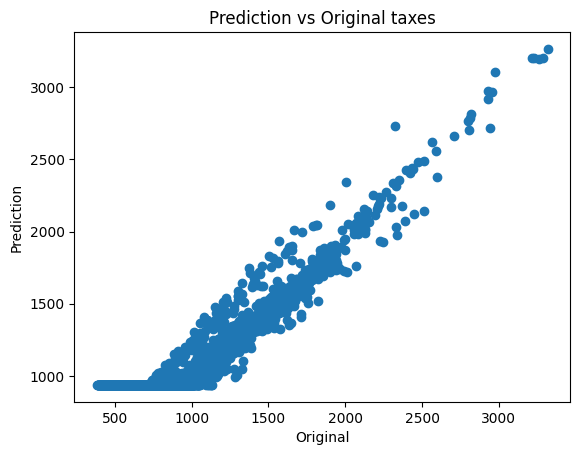

In [46]:
# Visualizing predictions vs actuals
for i, target in enumerate(target_vector_test.columns):
    plt.scatter(target_vector_test[target], inverse_predicted_test[:, i])
    plt.title(f'Prediction vs Original {target}')
    plt.xlabel('Original')
    plt.ylabel('Prediction')
    plt.show()

In [47]:
# added dummy data for prediction
household_data_input_model = pd.DataFrame(
              [[7000,65000, 50, 2, 0, 1]],
              columns=['total', 'median_family_income', 'num_counties_in_st', 'number_of_children', 'number_of_parents', 'number_of_family_members']
        )


In [48]:
# scaling the dummy data in the same format of the model fit
# Scaling the dummy data
poc_scaled = scaler_feature.transform(household_data_input_model[['number_of_parents', 'number_of_children', 'number_of_family_members','median_family_income','total','num_counties_in_st']])


In [49]:
#reshaping the inputs as per a simple RNN
poc_rnn = poc_scaled.reshape((poc_scaled.shape[0], 1, poc_scaled.shape[1]))

In [50]:
# predicting the dummy data
poc_prediction_scaled = household_rnn_model.predict(poc_rnn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [51]:
# Inversing the scale transformation to get original values
poc_household_income_sufficiency_prediction = scaler_target.inverse_transform(poc_prediction_scaled)

In [52]:
#displaying the predictions of the dummy data
print("Predicted outputs for the dummy data:")
for i, target in enumerate(target_vector_train.columns):
    print(f"{target}: {poc_household_income_sufficiency_prediction[0, i]}")

poc_predicted_household_expenses = poc_household_income_sufficiency_prediction.sum(axis=1)
print(poc_predicted_household_expenses)

Predicted outputs for the dummy data:
housing: 1176.3192138671875
food: 865.1036987304688
transportation: 1538.06591796875
healthcare: 1223.3309326171875
othernecessities: 674.8733520507812
childcare: 1440.3453369140625
taxes: 1153.0413818359375
[8071.08]


**STEP 7: Predicting the microeconomic level household income sufficiency **

In [53]:
# Predicting the micro economic level household income sufficiency
median_family_income = household_data_input_model['median_family_income'][0]
predicted_financial_stability = median_family_income / poc_predicted_household_expenses[0]

# Output the predicted micro economic level household income sufficiency also noted as the predicted financial stability
print(f"Predicted Financial Stability (Income / Total Expenses): {predicted_financial_stability}")

# Optional: you can store both predictions in a DataFrame for better visualization
predictions_df = pd.DataFrame({
    'Housing': poc_household_income_sufficiency_prediction[0, 0],
    'Food': poc_household_income_sufficiency_prediction[0, 1],
    'Transportation': poc_household_income_sufficiency_prediction[0, 2],
    'Healthcare': poc_household_income_sufficiency_prediction[0, 3],
    'Other Necessities': poc_household_income_sufficiency_prediction[0, 4],
    'Childcare': poc_household_income_sufficiency_prediction[0, 5],
    'Taxes': poc_household_income_sufficiency_prediction[0, 6],
    'Total Predicted Expenses': poc_predicted_household_expenses[0],
    'Predicted Financial Stability': predicted_financial_stability
}, index=[0])

print(predictions_df)

Predicted Financial Stability (Income / Total Expenses): 8.053445061977406
       Housing        Food  Transportation   Healthcare  Other Necessities  \
0  1176.319214  865.103699     1538.065918  1223.330933         674.873352   

     Childcare        Taxes  Total Predicted Expenses  \
0  1440.345337  1153.041382               8071.080078   

   Predicted Financial Stability  
0                       8.053445  


**STEP 8: Analysis of correlation matix heatmap**

['median_family_income', 'Total Predicted Expenses', 'Predicted Financial Stability']
median_family_income             65000.000000
Total Predicted Expenses          8071.080078
Predicted Financial Stability        8.053445
Name: 0, dtype: float64


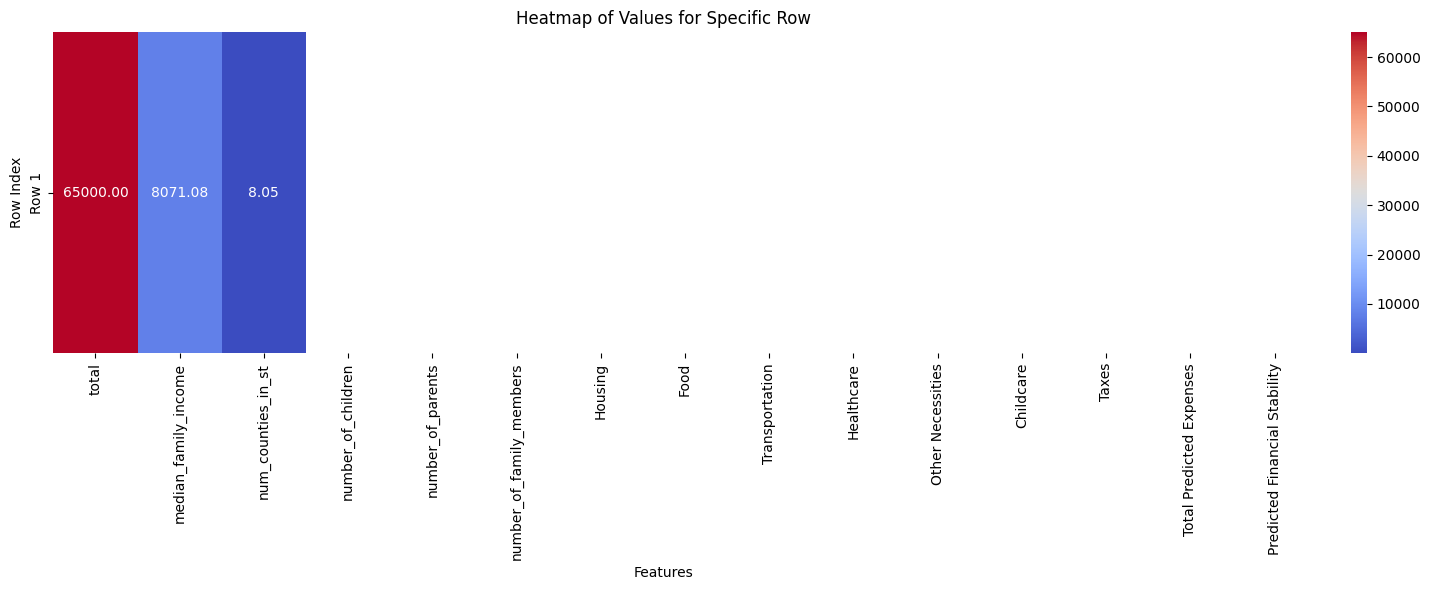

In [54]:
combined_df = pd.concat([household_data_input_model, predictions_df], axis=1)


# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

#modify
row_needed = ['median_family_income','Total Predicted Expenses','Predicted Financial Stability']
print(row_needed)
#filtered matrix modified
filtered_matix = correlation_matrix.loc[row_needed, row_needed]

#IMPORTANT PART--
filtered_row = combined_df.loc[0, row_needed]
print(filtered_row)

filtered_row = filtered_row.values.reshape(1, -1)



specific_row = combined_df.iloc[0]

specific_row = specific_row.values.reshape(1, -1)

# Create a heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(filtered_row, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=combined_df.columns, yticklabels=['Row 1'])

# Titles and labels
plt.title('Heatmap of Values for Specific Row')
plt.xlabel('Features')
plt.ylabel('Row Index')
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
print(specific_row)

[[7.00000000e+03 6.50000000e+04 5.00000000e+01 2.00000000e+00
  0.00000000e+00 1.00000000e+00 1.17631921e+03 8.65103699e+02
  1.53806592e+03 1.22333093e+03 6.74873352e+02 1.44034534e+03
  1.15304138e+03 8.07108008e+03 8.05344506e+00]]


In [56]:
combined_dataframe = pd.concat([household_data_input_model, predictions_df], axis = 1)

In [57]:
sufficiency_correlation_matix = combined_df.corr()
print(sufficiency_correlation_matix.columns)

Index(['total', 'median_family_income', 'num_counties_in_st',
       'number_of_children', 'number_of_parents', 'number_of_family_members',
       'Housing', 'Food', 'Transportation', 'Healthcare', 'Other Necessities',
       'Childcare', 'Taxes', 'Total Predicted Expenses',
       'Predicted Financial Stability'],
      dtype='object')


In [58]:
print(specific_row)

[[7.00000000e+03 6.50000000e+04 5.00000000e+01 2.00000000e+00
  0.00000000e+00 1.00000000e+00 1.17631921e+03 8.65103699e+02
  1.53806592e+03 1.22333093e+03 6.74873352e+02 1.44034534e+03
  1.15304138e+03 8.07108008e+03 8.05344506e+00]]


 **Libraries used for the backend implementation**

In [59]:
import joblib

joblib.dump(scaler_feature, 'scaler_feature.pkl') # file exported for the usage of the backend implementation
joblib.dump(scaler_target, 'scaler_target.pkl')# file exported for the usage of the backend implementation

['scaler_target.pkl']

In [60]:
# Saving the trained model
household_rnn_model.save('poc_household_income_sufficiency_model_rnn.h5')